# Notebook Project Probabilistic view in linguistic variation

In [1]:
import os
os.sys.path.append('../project_code')

from data.bhsa import book_sets, get_data
from markov.Markov_Chain import *
from PCA.PCA import * 
from Clustering.Clustering_analysis import *
from Distance.Distances import *
from Frequency.Occurences import *
from scipy.cluster.hierarchy import cophenet
from Figures.Raw_Transformed import * 

test = get_data(books=["sbh","lbh"])#
features = {'clause_types', 'phrase_functions', 'phrase_types', 'word_pos'}
domain = {'N', 'Q', 'D'}

In [2]:
 test["phrase_functions"]["N"]["Genesis"][:10]

[['Conj', 'Pred', 'Subj'],
 ['Conj', 'Pred', 'Subj'],
 ['Conj', 'Pred', 'Subj', 'Objc'],
 ['Conj', 'Pred'],
 ['Conj', 'Pred', 'Subj', 'Cmpl'],
 ['Conj', 'Pred', 'Subj', 'Cmpl', 'Objc'],
 ['Conj', 'Cmpl', 'Pred', 'Objc'],
 ['Conj', 'Pred', 'Subj'],
 ['Conj', 'Pred', 'Subj'],
 ['PreC']]

# Transitions

In [3]:
data_raw = collections.defaultdict(dict)
data_trans = collections.defaultdict(dict)

for f in features:
    for d in domain:
        if f != "clause_types": 
            transMatrix = transitionMatrix(test[f][d], True) 
        else:
            transMatrix = transitionMatrix(test[f][d], False) 
        if len(transMatrix.keys())>0: 
            
            transDict = df_dict_Transformation(transMatrix)
            data_raw[f][d] = pd.DataFrame(transDict).fillna(0)
            
            transMatrix = averageTransformation(transMatrix) #Here, transformations can be performed
            transDict = df_dict_Transformation(transMatrix)
            data_trans[f][d] = pd.DataFrame(transDict).fillna(0)     
stack_Data = stackTransitions(data_trans, features, "N")

# Example Dataset

In [4]:
data_raw["phrase_functions"]["N"].head(10)

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah
Adju->Adju,23.0,4.0,4.0,20.0,3.0,1.0,3.0,1.0,6.0,3.0,12.0,3.0,4.0,0.0,6.0
Adju->Clause_Begin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Clause_End,135.0,134.0,58.0,251.0,119.0,74.0,45.0,46.0,137.0,45.0,113.0,86.0,52.0,15.0,60.0
Adju->Cmpl,21.0,6.0,5.0,29.0,11.0,9.0,2.0,6.0,2.0,3.0,9.0,9.0,14.0,2.0,3.0
Adju->Conj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Exst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Frnt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->IntS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Intj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Loca,1.0,2.0,0.0,10.0,4.0,2.0,0.0,0.0,3.0,1.0,1.0,3.0,2.0,0.0,0.0


## Transitions transformation

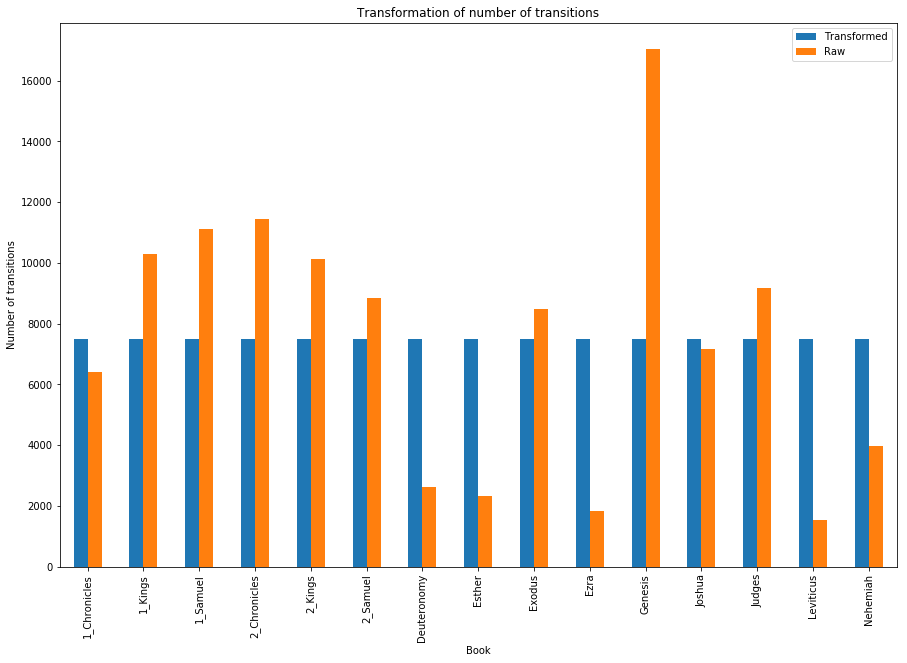

In [5]:
sums_Trans = data_trans["phrase_functions"]["N"].sum()
sums_raw = data_raw["phrase_functions"]["N"].sum()
raw_transPictures(sums_Trans,sums_raw)

# Hierarchical Clustering


Distance measures: 'canberra', 'braycurtis', 'cityblock', 'chebyshev', 'cosine', 'correlation', 'euclidean', 'sqeuclidean'

Linkage methods: 'average', 'centroid', 'complete', 'median', 'single', 'ward', 'weighted'

## Example 1

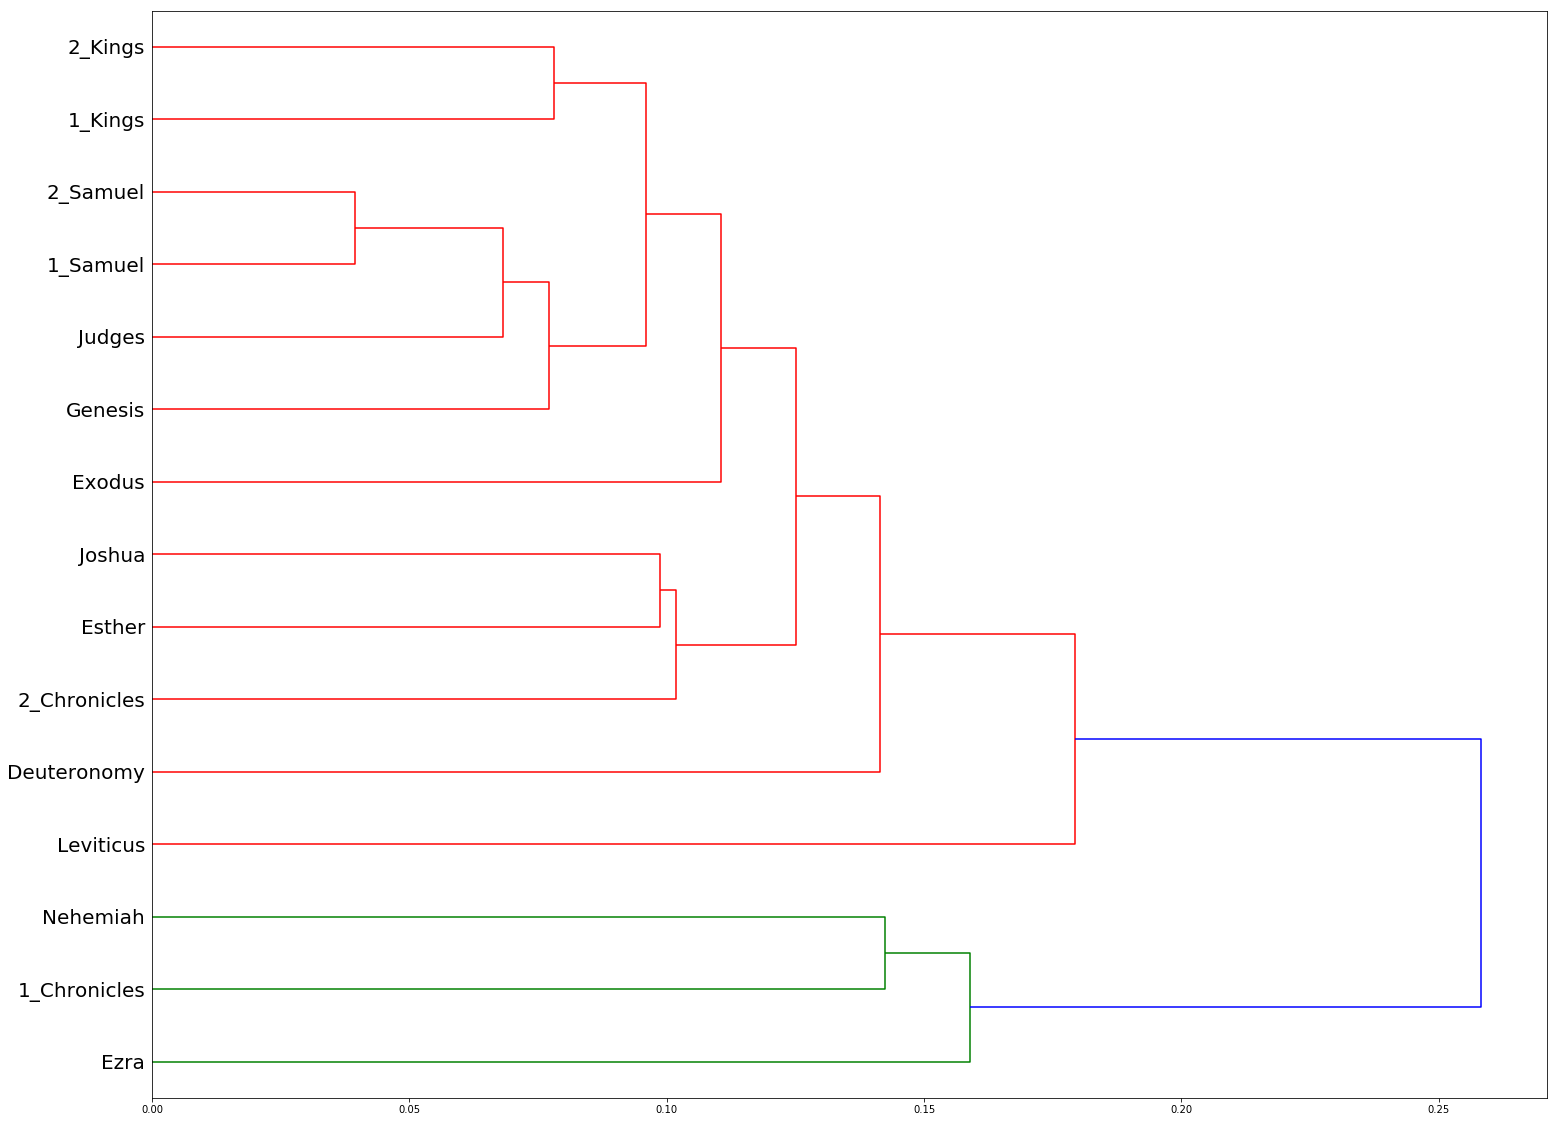

In [6]:
metric = "braycurtis" 
linkage = "weighted"
data = data_trans["phrase_functions"]["N"]

distancemetric = matrixDistances(data.T.values, metric)
Z = linkageFunction(distancemetric,linkage)
dendogramPlot(Z, data.keys())

## Example 2

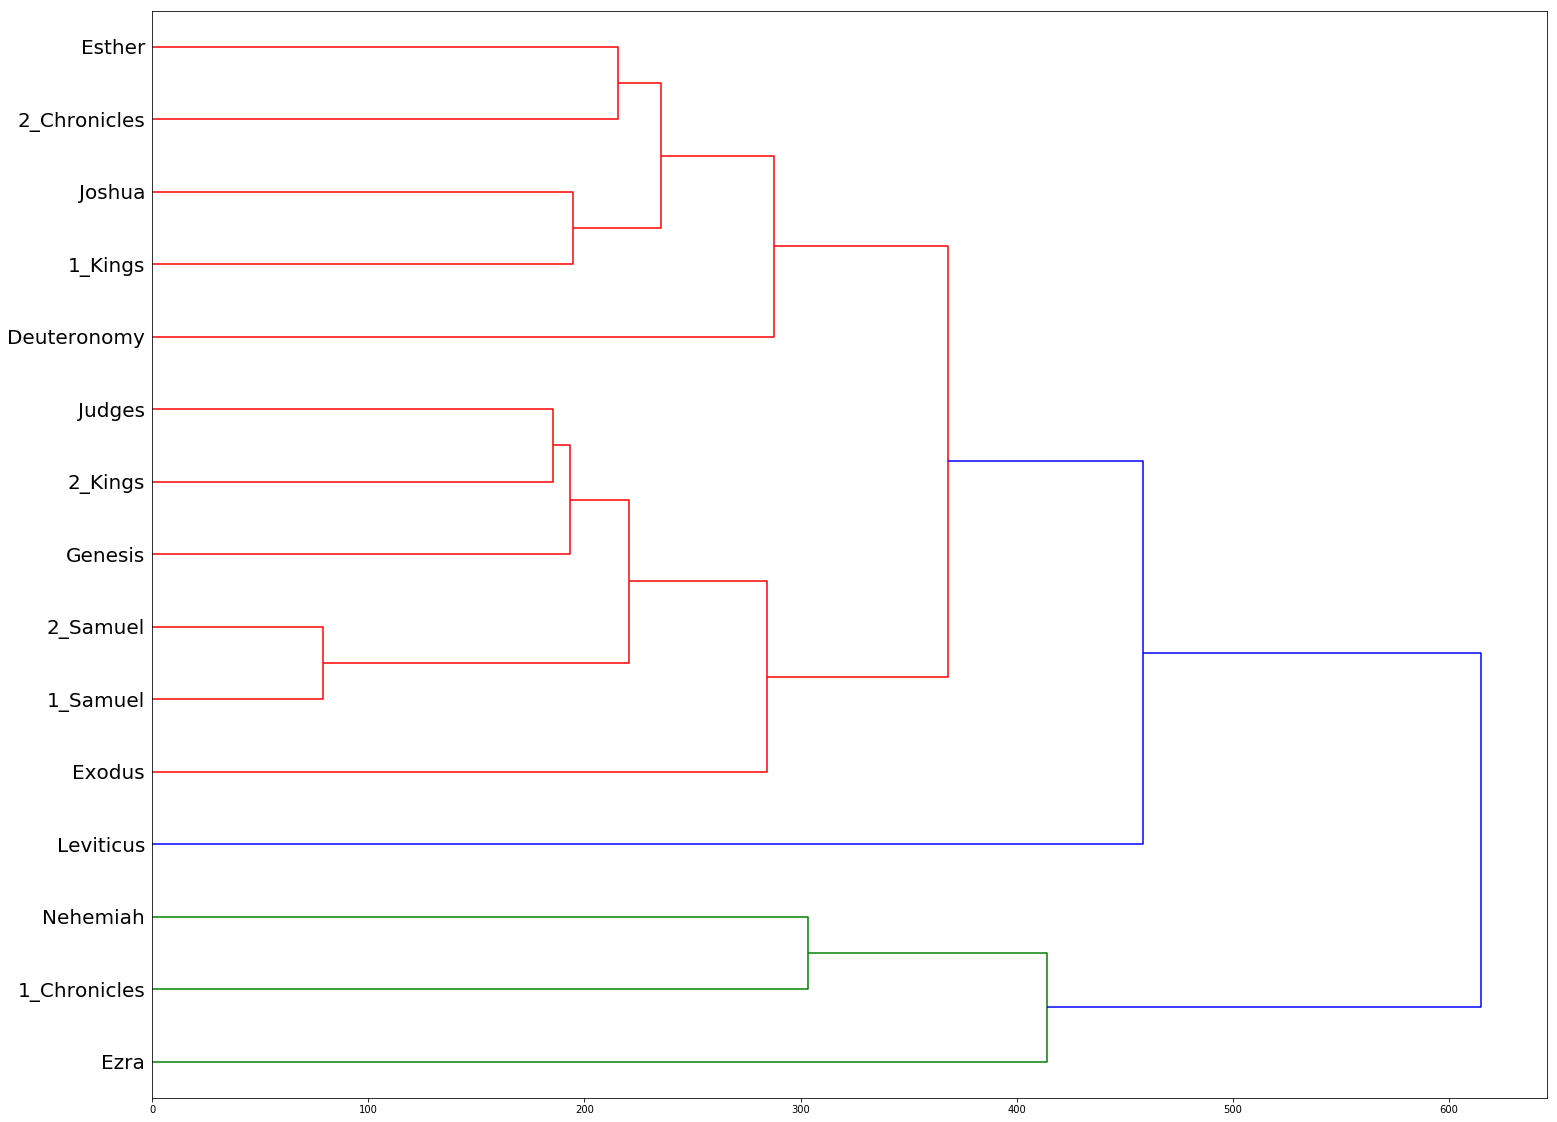

In [7]:
metric = "euclidean"
linkage = "average"
data = data_trans["phrase_functions"]["N"]

distancemetric = matrixDistances(data.T.values, metric)
Z = linkageFunction(distancemetric, linkage)
dendogramPlot(Z, data.keys())

## Clustering Analysis

## Narrative

In [8]:
nClusters = 2

results = collections.defaultdict(dict)
for f in features:
    for metric in simpleMetric:
        for method in clusterMethods:
            for d in ["N"]:
                if not data_trans[f][d].empty:
                    distancemetric = matrixDistances(data_trans[f][d].T.values, metric)
                    distancemetric = np.nan_to_num(distancemetric)
                    Z = linkageFunction(distancemetric, method)
                    flat = flattenClustering(Z, nClusters, "maxclust")
                    tag = f+ "|" + metric +"|" +method
                    results[tag] = flat

In [9]:
df_Results = pd.DataFrame(results, index = data.keys()).T 
df_Results.head(10)

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah
clause_types|braycurtis|average,1,2,2,2,2,2,2,2,2,1,2,2,2,2,1
clause_types|braycurtis|centroid,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1
clause_types|braycurtis|complete,2,1,1,1,1,1,1,2,1,2,1,2,1,1,2
clause_types|braycurtis|median,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1
clause_types|braycurtis|single,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1
clause_types|braycurtis|ward,2,1,1,1,1,1,1,2,1,2,1,1,1,1,2
clause_types|braycurtis|weighted,2,1,1,1,1,1,1,2,1,2,1,2,1,1,2
clause_types|canberra|average,2,1,1,1,1,1,2,2,1,2,1,2,1,2,2
clause_types|canberra|centroid,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1
clause_types|canberra|complete,1,2,2,2,2,2,1,1,2,1,2,1,2,1,1


# Jaccard distance: 1-agreeement / Total

In [10]:
distancemetric = matrixDistances(df_Results.T.values, "jaccard")
pd.DataFrame(squareFormFunction(distancemetric), index = data.keys(),columns = data.keys())

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah
1_Chronicles,0.000000,0.437500,0.477679,0.441964,0.473214,0.477679,0.419643,0.388393,0.428571,0.397321,0.495536,0.383929,0.477679,0.477679,0.058036
1_Kings,0.437500,0.000000,0.040179,0.004464,0.035714,0.040179,0.080357,0.138393,0.008929,0.834821,0.058036,0.071429,0.040179,0.138393,0.388393
1_Samuel,0.477679,0.040179,0.000000,0.044643,0.004464,0.000000,0.093750,0.178571,0.049107,0.875000,0.017857,0.111607,0.000000,0.142857,0.428571
2_Chronicles,0.441964,0.004464,0.044643,0.000000,0.040179,0.044643,0.084821,0.142857,0.013393,0.839286,0.062500,0.075893,0.044643,0.142857,0.392857
2_Kings,0.473214,0.035714,0.004464,0.040179,0.000000,0.004464,0.089286,0.174107,0.044643,0.870536,0.022321,0.107143,0.004464,0.138393,0.424107
2_Samuel,0.477679,0.040179,0.000000,0.044643,0.004464,0.000000,0.093750,0.178571,0.049107,0.875000,0.017857,0.111607,0.000000,0.142857,0.428571
Deuteronomy,0.419643,0.080357,0.093750,0.084821,0.089286,0.093750,0.000000,0.093750,0.080357,0.808036,0.111607,0.107143,0.093750,0.058036,0.370536
Esther,0.388393,0.138393,0.178571,0.142857,0.174107,0.178571,0.093750,0.000000,0.129464,0.776786,0.196429,0.084821,0.178571,0.151786,0.330357
Exodus,0.428571,0.008929,0.049107,0.013393,0.044643,0.049107,0.080357,0.129464,0.000000,0.825893,0.066964,0.062500,0.049107,0.138393,0.379464
Ezra,0.397321,0.834821,0.875000,0.839286,0.870536,0.875000,0.808036,0.776786,0.825893,0.000000,0.892857,0.781250,0.875000,0.866071,0.446429


# Cophenet Correlation: Which method clusters most accurate the distances

Correlation: 1 is good relation, 0 is no relation

In [11]:
for method in clusterMethods:
    Z = linkageFunction(distancemetric, method)
    rho, ar = cophenet(Z,distancemetric)
    print(method, rho)

average 0.887474245023
weighted 0.965471068856
complete 0.884428864549
centroid 0.970619349041
median 0.965926151351
ward 0.880993642607
single 0.929685822129


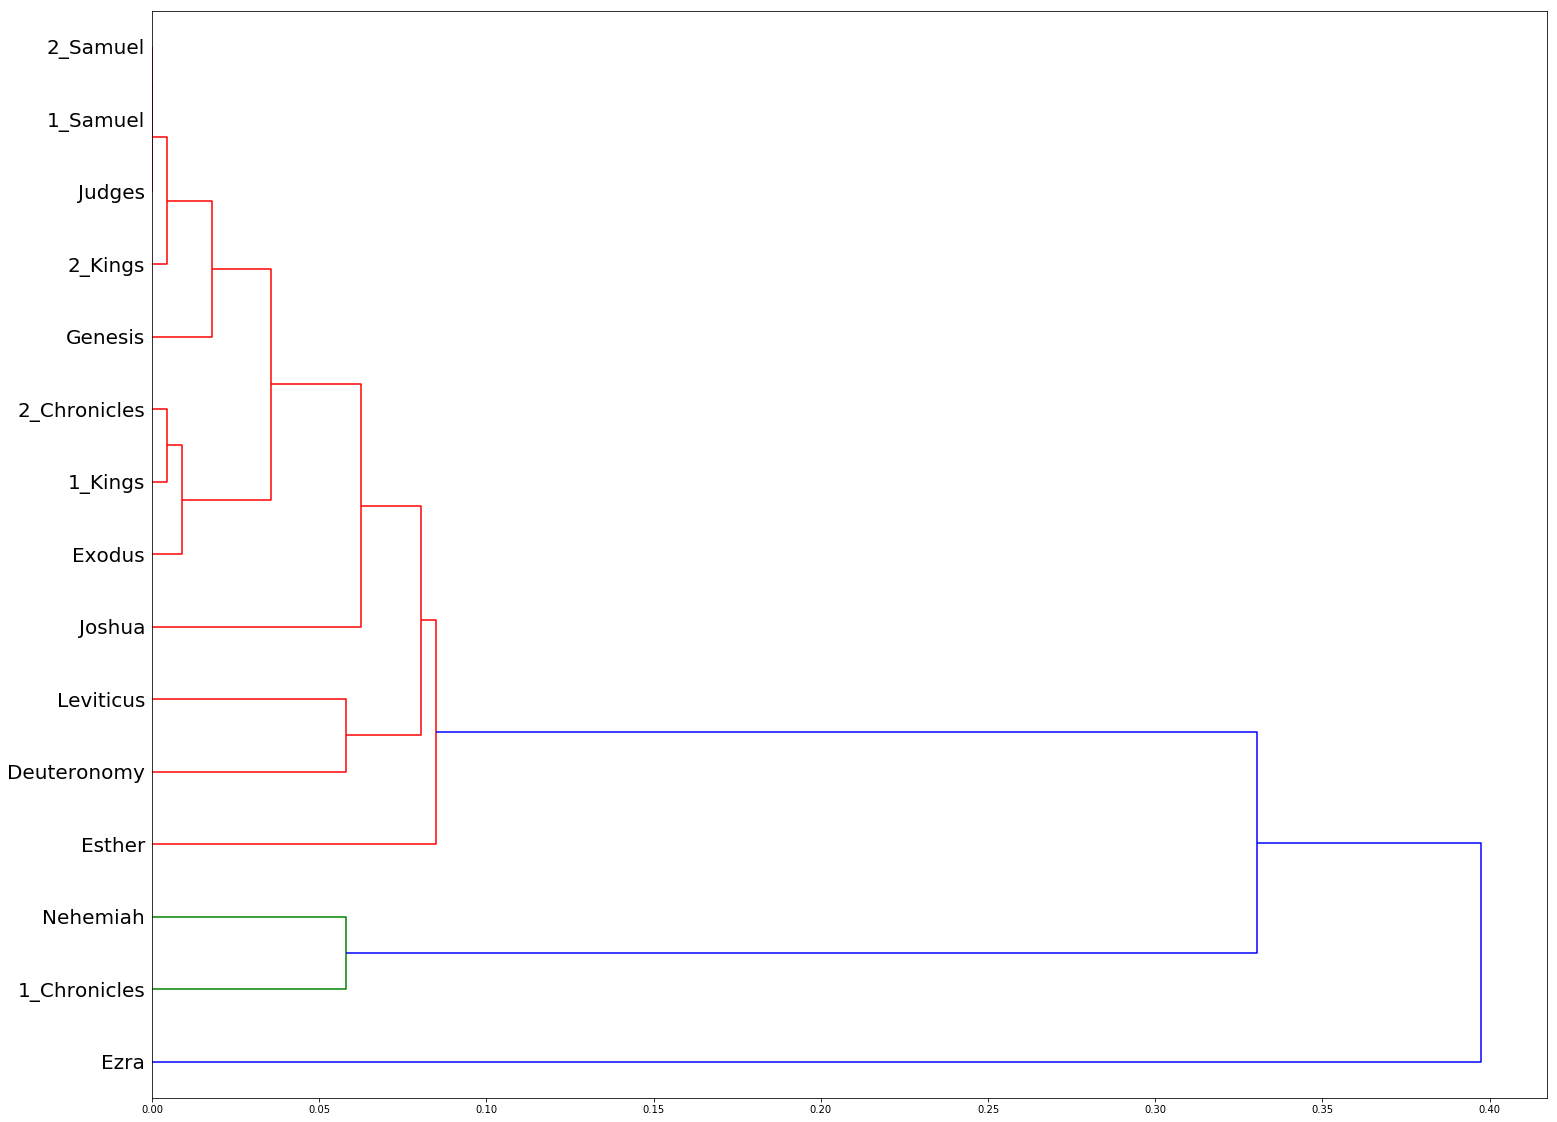

In [12]:
Z = linkageFunction(distancemetric, "single")
dendogramPlot(Z, data.keys())

# Clustering with Discourse

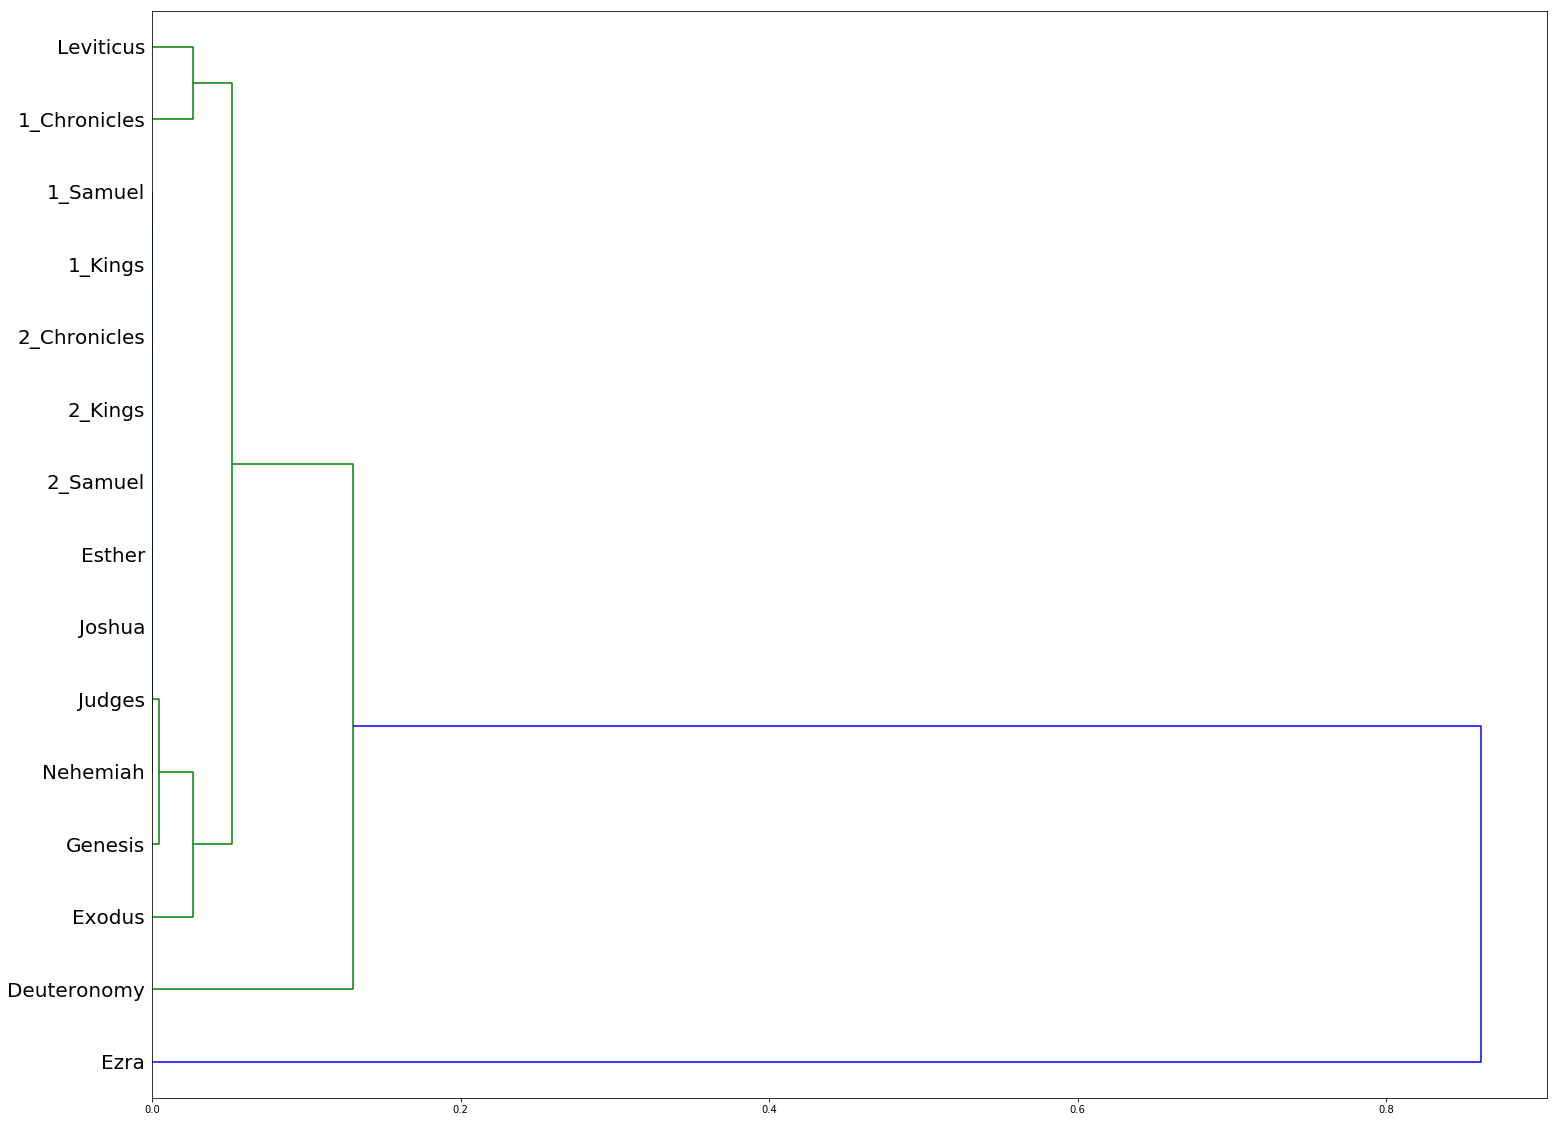

In [13]:
nClusters = 2

results = collections.defaultdict(dict)
for f in features:
    for metric in simpleMetric:
        for method in clusterMethods:
            for d in ["D"]:
                if not data_trans[f][d].empty:
                    distancemetric = matrixDistances(data_trans[f][d].T.values, metric)
                    distancemetric = np.nan_to_num(distancemetric)
                    Z = linkageFunction(distancemetric, method)
                    flat = flattenClustering(Z, nClusters, "maxclust")
                    tag = f+ "|" + metric +"|" +method
                    results[tag] = flat
df_Results = pd.DataFrame(results, index = data.keys()).T 
distancemetric = matrixDistances(df_Results.T.values, "jaccard")
Zd = linkageFunction(distancemetric, "average")
dendogramPlot(Zd, data.keys())

## Clustering with Narrative and Discourse

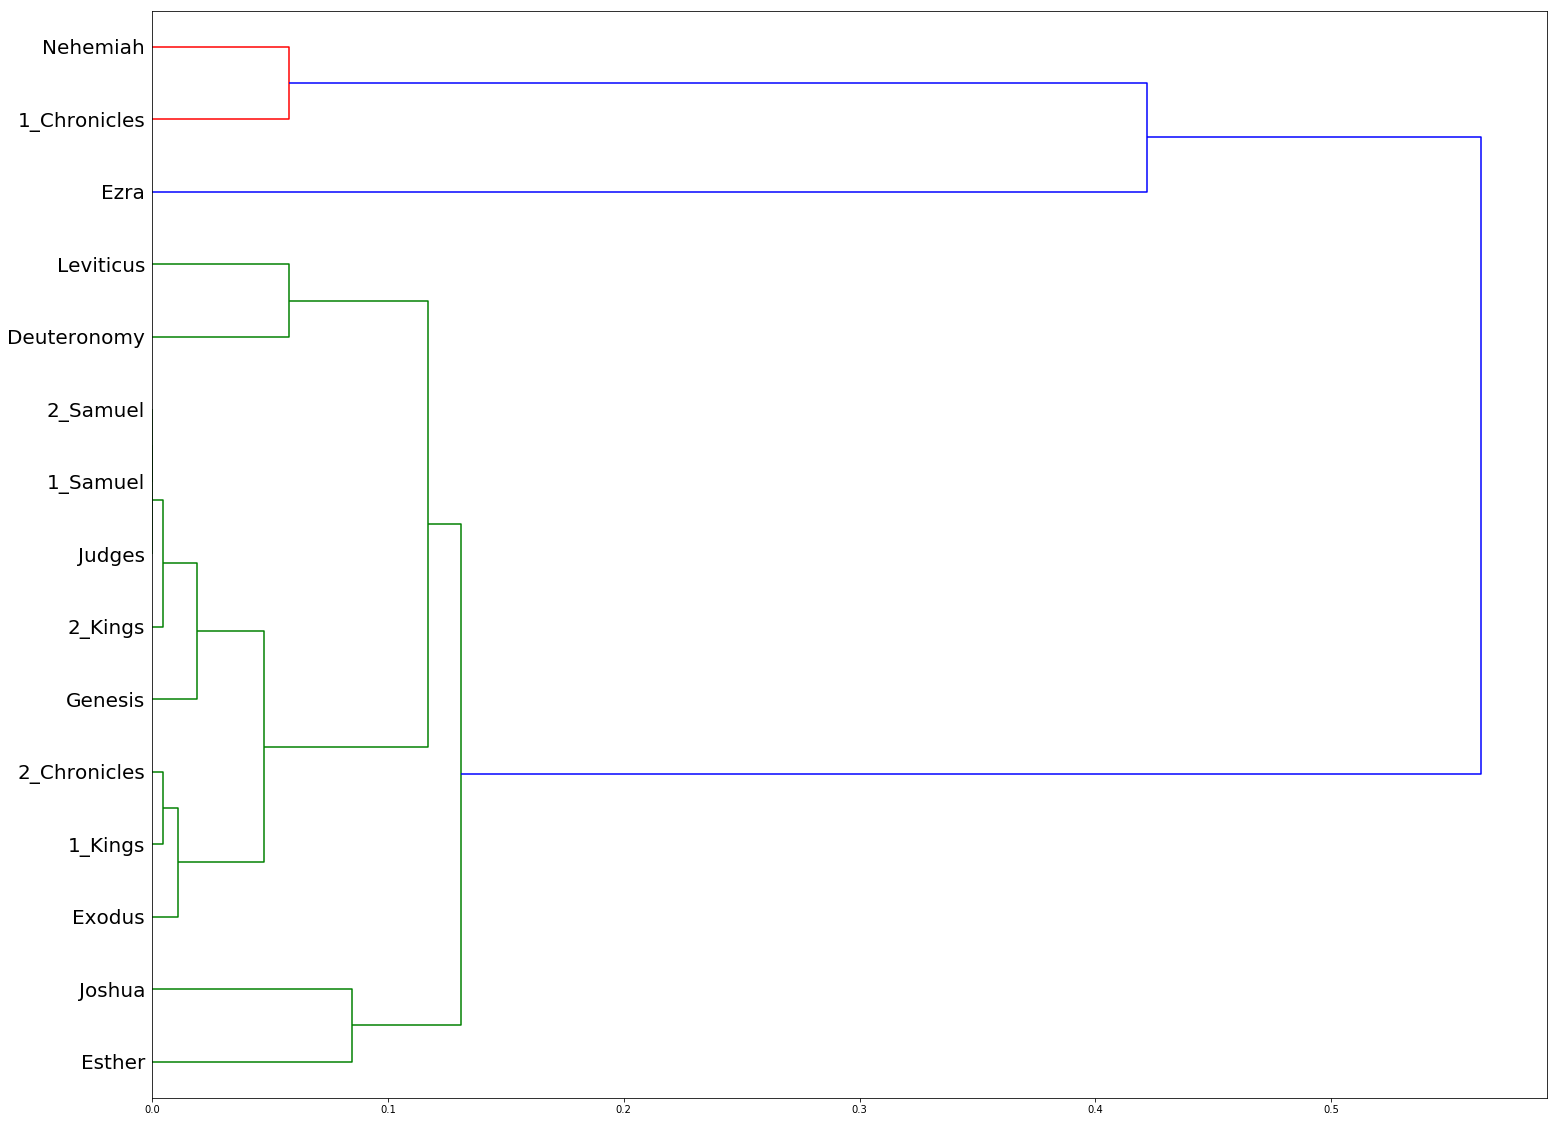

In [14]:
nClusters = 2

results = collections.defaultdict(dict)
for f in features:
    for metric in simpleMetric:
        for method in clusterMethods:
            for d in ["D","N"]:
                if not data_trans[f][d].empty:
                    distancemetric = matrixDistances(data_trans[f][d].T.values, metric)
                    distancemetric = np.nan_to_num(distancemetric)
                    Z = linkageFunction(distancemetric, method)
                    flat = flattenClustering(Z, nClusters, "maxclust")
                    tag = f+ "|" + metric +"|" +method
                    results[tag] = flat
df_Results = pd.DataFrame(results, index = data.keys()).T 
distancemetric = matrixDistances(df_Results.T.values, "jaccard")
Zd = linkageFunction(distancemetric, "average")
dendogramPlot(Zd, data.keys())

# PCA

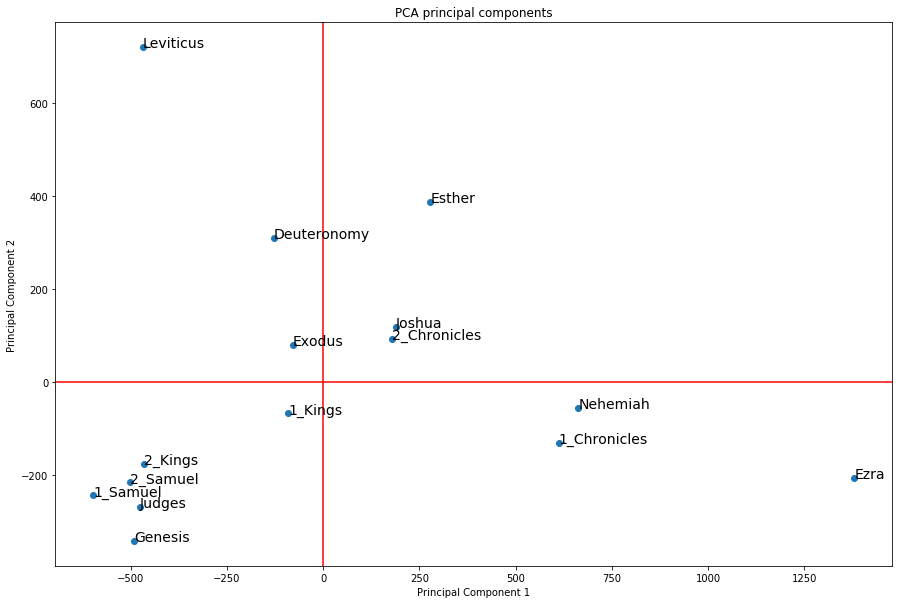

In [15]:
pca = PCA(n_components=2)
fit = pca.fit_transform(stack_Data.T.values) 
plt.figure(1, figsize=(15, 10))     
plt.scatter(fit[:, 0], fit[:, 1])
books = stack_Data.keys()
for i, book in enumerate(books):
    plt.annotate(book, xy=(fit[i, 0], fit[i, 1]), fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color="r", linestyle='-')
plt.title("PCA principal components")
plt.show()

# Prediction of Ruth and Jonah ?

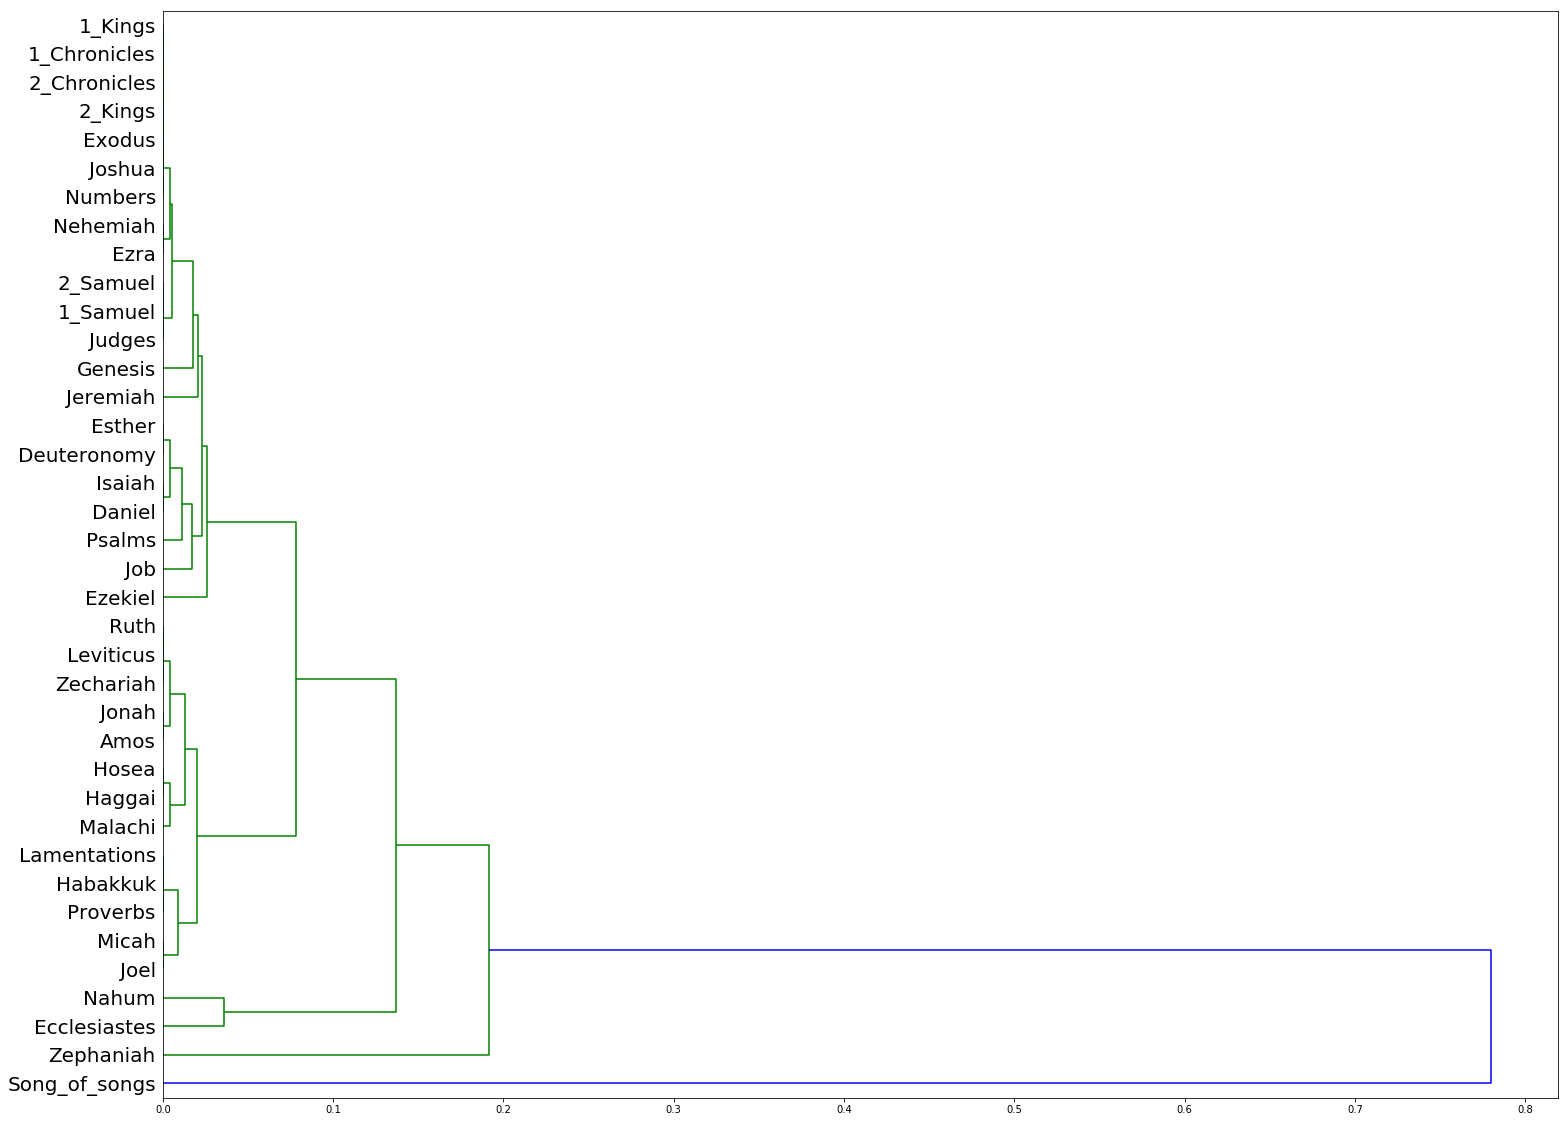

In [25]:
test = get_data(books="all")#
data_raw = collections.defaultdict(dict)
data_trans = collections.defaultdict(dict)

for f in features:
    for d in domain:
        if f != "clause_types": 
            transMatrix = transitionMatrix(test[f][d], True) 
        else:
            transMatrix = transitionMatrix(test[f][d], False) 
        if len(transMatrix.keys())>0: 
            
            transDict = df_dict_Transformation(transMatrix)
            data_raw[f][d] = pd.DataFrame(transDict).fillna(0)
            
            transMatrix = averageTransformation(transMatrix) #Here, transformations can be performed
            transDict = df_dict_Transformation(transMatrix)
            data_trans[f][d] = pd.DataFrame(transDict).fillna(0)     
stack_Data = stackTransitions(data_trans, features, "N")
nClusters = 2

results = collections.defaultdict(dict)
for f in features:
    for metric in simpleMetric:
        for method in clusterMethods:
            for d in ["N"]:
                if not data_trans[f][d].empty:
                    distancemetric = matrixDistances(data_trans[f][d].T.values, metric)
                    distancemetric = np.nan_to_num(distancemetric)
                    Z = linkageFunction(distancemetric, method)
                    flat = flattenClustering(Z, nClusters, "maxclust")
                    tag = f+ "|" + metric +"|" +method
                    results[tag] = flat


df_Results = pd.DataFrame(results).T 
distancemetric = matrixDistances(df_Results.T.values, "jaccard")
Zd = linkageFunction(distancemetric, "average")
dendogramPlot(Zd, stack_Data.keys())
